# DSS 머신러닝1 중간고사 

- 주어진 데이터(example_1.csv)는 반도체 제조 공정에서 자재별 불량의 수를 나타낸 데이터로 아래와 같다. 데이터에는 불량의 수 이외에 자재의 구분 번호, 공정 종료 시간, 공정 구분, 사용된 장비의 종류 그리고 다양한 센서에서 측정된 값들의 표준편차, 분산, 범위 (STDDEV, MEAN, RANGE)와 같은 변수들이 존재한다. 

- 이번 중간고사는 데이터 전처리 대체과제로 해당 데이터의 전처리 및 NULL값 채우기, 이상치 제거, 시각화 과정을 포함하고 있다. 차례대로 코드를 작성 및 실행을 통해 문제를 풀어 제출하시오.

## 패키지 불러오기

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.rc('font', family='AppleGothic')

## 1. 데이터 전처리

#### 0. 데이터 불러오기

In [2]:
prac_data = pd.read_csv('example_1.csv')

#### 1. 데이터 첫행 5개 출력

In [3]:
prac_data.head(5)

,자재구분,END_DATE_TIME,공정구분,불량,장비CH구분,TAE.STDDEV0,TAE.MEAN0,TAE.RANGE0,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.STDDEV0,CROT.MEAN0,CROT.RANGE0,TAE.STDDEV1,TAE.MEAN1,TAE.RANGE1,CROT.STDDEV1,CROT.MEAN1,CROT.RANGE1,PC.STDDEV1,PC.MEAN1,PC.RANGE1,TAE.STDDEV13,TAE.MEAN13,TAE.RANGE13,PC.STDDEV13,PC.MEAN13,PC.RANGE13,CROT.STDDEV13,CROT.MEAN13,CROT.RANGE13,TAE.STDDEV5,TAE.MEAN5,TAE.RANGE5,CROT.STDDEV5,CROT.MEAN5,CROT.RANGE5,PC.STDDEV5,PC.MEAN5,PC.RANGE5,TAE.STDDEV3,TAE.MEAN3,TAE.RANGE3,PC.STDDEV3,PC.MEAN3,PC.RANGE3,CROT.STDDEV3,CROT.MEAN3,CROT.RANGE3,CROT.STDDEV11,CROT.MEAN11,CROT.RANGE11,TAE.STDDEV11,TAE.MEAN11,TAE.RANGE11,PC.STDDEV11,PC.MEAN11,PC.RANGE11,PC.STDDEV10,PC.MEAN10,PC.RANGE10,CROT.STDDEV10,CROT.MEAN10,CROT.RANGE10,TAE.STDDEV10,TAE.MEAN10,TAE.RANGE10,CROT.STDDEV2,CROT.MEAN2,CROT.RANGE2,TAE.STDDEV2,TAE.MEAN2,TAE.RANGE2,PC.STDDEV2,PC.MEAN2,PC.RANGE2,CROT.STDDEV7,CROT.MEAN7,CROT.RANGE7,TAE.STDDEV7,TAE.MEAN7,TAE.RANGE7,PC.STDDEV7,PC.MEAN7,PC.RANGE7,PC.STDDEV8,PC.MEAN8,PC.RANGE8,TAE.STDDEV8,TAE.MEAN8,TAE.RANGE8,CROT.STDDEV8,CROT.MEAN8,CROT.RANGE8,CROT.STDDEV14,CROT.MEAN14,CROT.RANGE14,TAE.STDDEV14,TAE.MEAN14,TAE.RANGE14,PC.STDDEV14,PC.MEAN14,PC.RANGE14,TAE.STDDEV6,TAE.MEAN6,TAE.RANGE6,PC.STDDEV6,PC.MEAN6,PC.RANGE6,CROT.STDDEV6,CROT.MEAN6,CROT.RANGE6,TAE.STDDEV4,TAE.MEAN4,TAE.RANGE4,CROT.STDDEV4,CROT.MEAN4,CROT.RANGE4,PC.STDDEV4,PC.MEAN4,PC.RANGE4,CROT.STDDEV12,CROT.MEAN12,CROT.RANGE12,TAE.STDDEV12,TAE.MEAN12,TAE.RANGE12,PC.STDDEV12,PC.MEAN12,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.STDDEV9,CROT.MEAN9,CROT.RANGE9,PC.STDDEV9,PC.MEAN9,PC.RANGE9
0,1,2017-09-25 16:18,1번공정,69,4.0,NaN,NaN,NaN,0.124753,0.044329,0.439883,0,35,0,0.121240,38.055619,0.317690,0,35,0,2.082389,44.228890,7.722385,0.309010,35.799846,1.016620,0.767937,45.194892,4.105572,0.0,35.0,0.0,0.022406,35.021534,0.127077,0,35,0,1.066394,45.160869,11.436951,0.039343,34.079036,0.127076,2.643621,57.197500,13.196480,0.0,35.0,0,0,35,0,0.105175,34.992667,0.444770,2.970423,45.796676,14.858261,0.916971,44.861925,4.154447,0,35,0,0.079951,38.009799,0.190615,0.0,35.0,0,0.089351,34.055887,0.571847,0.156611,56.501051,1.661780,0,35,0,0.022898,35.015540,0.127077,1.271140,45.185728,12.170089,1.660876,45.556057,6.256112,0.071511,38.017741,0.254153,0.0,35.0,0.0,0.0,35.0,0.0,0.000000,35.968620,0.000000,0.00000,3.714565,0.000000,0.061101,38.034651,0.254153,0.468056,44.957059,2.981427,0.0,35.0,0,0.212885,37.895276,0.635387,0.0,35.0,0.0,0.226691,45.082459,1.173024,0,35,0,0.164348,30.870404,0.698922,3.821034,57.645580,17.350926,0.032832,35.011650,0.127077,0,35,0,0.405343,45.124841,3.079182
1,2,2017-09-25 16:13,1번공정,28,2.0,0.034801,38.052395,0.063538,0.177575,0.342131,0.439883,0,27,0,0.115462,38.016088,0.317695,0,27,0,4.485573,43.401760,17.008798,0.296837,36.342460,0.953080,0.295544,45.076476,1.759528,0.0,27.0,0.0,NaN,NaN,NaN,0,27,0,0.258892,45.065592,2.981426,0.043760,34.542577,0.127079,0.513855,56.572739,2.492667,0.0,27.0,0,0,27,0,0.108088,35.515738,0.444770,0.316293,45.065419,1.710655,0.112830,45.042155,0.391007,0,27,0,0.081925,38.080194,0.317690,0.0,27.0,0,0.083689,34.513293,0.571849,0.838911,56.633541,8.113390,0,27,0,0.030655,35.548180,0.127080,0.177952,45.092321,1.466278,0.834384,45.281600,3.128057,0.072328,38.064309,0.317690,0.0,27.0,0.0,0.0,27.0,0.0,0.000000,36.495700,0.000000,0.00000,3.567937,0.000000,0.046026,38.053420,0.254153,0.393597,45.110669,1.710655,0.0,27.0,0,0.143218,37.917376,0.444771,0.0,27.0,0.0,NaN,NaN,NaN,0,27,0,0.182612,31.379571,0.635388,0.303504,56.613882,1.466280,0.020858,35.550245,0.063540,0,27,0,1.923012,45.350277,15.004887
2,3,2017-09-25 16:15,1번공정,13,NaN,0.030089,38.046407,0.127080,0.137559,0.063983,0.488759,0,15,0,0.119149,38.029244,0.317692,0,15,0,2.772591,43.897500,10.459431,0.368458,36.721879,1.207230,1.378733,45.330828,7.331377,0.0,15.0,0.0,NaN,NaN,NaN,0,15,0,1.054788,45.177723,10.997066,0.052235,35.071344,0.190610,4.176787,57.711759,19.990226,0.0,15.0,0,0,15,0,NaN,NaN,NaN,0.250996,45.116858,1.319644,1.465553,45.515640,5.180838,0,15,0,0.077226,38.117744,0.254153,

#### 2. 자재구분, 공정구분 변수 제거

In [4]:
pre_data1 = prac_data.drop(columns=['자재구분','공정구분']).copy()

#### 3. END_DATE_TIME 변수를 통해 년도, 월, 일 3개의변수를 숫자형 변수로 생성하고 END_DATE_TIME 변수는 제거

In [5]:
pre_data1['년도'] = pre_data1['END_DATE_TIME'].str[:4].astype(int)
pre_data1['월'] = pre_data1['END_DATE_TIME'].str[5:7].astype(int)
pre_data1['일'] = pre_data1['END_DATE_TIME'].str[8:10].astype(int)

pre_data2 = pre_data1.drop(columns='END_DATE_TIME')

#### 4. 불량 수 50 미만을 0으로, 50 이상을 1로 설정하는 새로운 출력변수 y를 만들고 '불량' 변수를 제거

In [6]:
pre_data2['y'] = 0
pre_data2.loc[prac_data['불량'] >= 50, 'y'] = 1
pre_data2.loc[prac_data['불량'] < 50, 'y'] = 0
pre_data3 = pre_data2.drop(columns='불량')

## 2. 결측치 채우기

#### 0. 결측치 확인


In [17]:
pre_data3.isnull().sum()

장비CH구분         10
TAE.STDDEV0    41
TAE.MEAN0      41
TAE.RANGE0     41
PC.STDDEV0      0
               ..
PC.RANGE9       0
년도              0
월               0
일               0
y               0
Length: 140, dtype: int64

#### 1. 장비CH구분 변수의 결측치를 최빈값으로 대치


In [40]:
pre_data3['장비CH구분'].fillna(pre_data3['장비CH구분'].mode()[0], inplace=True)

In [41]:
pre_data4 = pre_data3.copy()

#### 2. 결측치가 40개 이상 변수 제거 

In [42]:
na_40_list = pre_data4.columns[pre_data4.isnull().sum() >= 40]
pre_data5 = pre_data4.drop(columns=na_40_list)

In [43]:
pre_data5.columns[pre_data5.isnull().sum() >= 40]  # 결측치 처리 확인

Index([], dtype='object')

#### 3. 결측치가 5개 이하인 변수들의 행 결측치 제거

In [44]:
na_5_list = pre_data5.columns[(pre_data5.isnull().sum() <= 5) & (pre_data5.isnull().sum() != 0)]

In [45]:
drop_idx = pre_data5.index[pre_data5[na_5_list].isnull().sum(axis=1) > 0]

pre_data6 = pre_data5.drop(index=drop_idx)
    
    

#### 4. 결측치가 5개 초과 10개 이하인 변수를 중앙값으로 대치 


In [46]:
na_5_10_list = pre_data6.columns[(pre_data6.isnull().sum() > 5) & (pre_data6.isnull().sum() <= 10)]

In [51]:
pre_data7 = pre_data6.fillna(pre_data6[na_5_10_list].median())

In [52]:
pre_data7.columns[(pre_data7.isnull().sum() > 5) & (pre_data7.isnull().sum() <= 10)]  # 결측치 처리 확인

Index([], dtype='object')

#### 5. 결측치가 10개 초과 30개 이하인 변수를 평균으로 대치 (장비 변수를 사용하여 장비 변수의 그룹별 평균으로 대치)


In [156]:
na_10_30_list = pre_data7.columns[(pre_data7.isnull().sum() > 10) & (pre_data7.isnull().sum() <= 30)]

In [158]:
pre_data8 = pre_data7.fillna(pre_data7.groupby('장비CH구분')[na_10_30_list].transform('mean'))

In [159]:
pre_data8.columns[(pre_data8.isnull().sum() > 10) & (pre_data8.isnull().sum() <= 30)]  # 결측치 처리 확인

Index([], dtype='object')

#### 6. 결측치가 30개를 초과하는 변수를 선형 보간법으로 대치
- 만약 모든 과정을 진행했음에도 결측치가 존재한다면 bfill, ffill중 하나를 통해 결측치를 채우시오


In [160]:
pre_data8.columns[(pre_data8.isnull().sum() > 30) ]

Index(['PC.STDDEV4', 'PC.MEAN4', 'PC.RANGE4'], dtype='object')

In [161]:
pre_data9 = pre_data8.bfill()

In [162]:
pre_data9.columns[(pre_data9.isnull().sum() > 30) ] # 결측치 처리 확인

Index([], dtype='object')

In [177]:
pre_data9.isnull().sum().sum()  # 결측치 처리 확인

0

## 3. 이상치 전처리 


#### 1. +-3시그마로 이상치 제거 진행 ('불량','년도','월','일' 제외)

In [163]:
pre_data9.describe()

,장비CH구분,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.STDDEV0,CROT.MEAN0,CROT.RANGE0,TAE.STDDEV1,TAE.MEAN1,TAE.RANGE1,CROT.STDDEV1,CROT.MEAN1,CROT.RANGE1,PC.STDDEV1,PC.MEAN1,PC.RANGE1,TAE.STDDEV13,TAE.MEAN13,TAE.RANGE13,PC.STDDEV13,PC.MEAN13,PC.RANGE13,CROT.STDDEV13,CROT.MEAN13,CROT.RANGE13,TAE.STDDEV5,TAE.MEAN5,TAE.RANGE5,CROT.STDDEV5,CROT.MEAN5,CROT.RANGE5,PC.STDDEV5,PC.MEAN5,PC.RANGE5,TAE.STDDEV3,TAE.MEAN3,TAE.RANGE3,PC.STDDEV3,PC.MEAN3,PC.RANGE3,CROT.STDDEV3,CROT.MEAN3,CROT.RANGE3,CROT.STDDEV11,CROT.MEAN11,CROT.RANGE11,TAE.STDDEV11,TAE.MEAN11,TAE.RANGE11,PC.STDDEV11,PC.MEAN11,PC.RANGE11,PC.STDDEV10,PC.MEAN10,PC.RANGE10,CROT.STDDEV10,CROT.MEAN10,CROT.RANGE10,TAE.STDDEV10,TAE.MEAN10,TAE.RANGE10,CROT.STDDEV2,CROT.MEAN2,CROT.RANGE2,TAE.STDDEV2,TAE.MEAN2,TAE.RANGE2,PC.STDDEV2,PC.MEAN2,PC.RANGE2,CROT.STDDEV7,CROT.MEAN7,CROT.RANGE7,TAE.STDDEV7,TAE.MEAN7,TAE.RANGE7,PC.STDDEV7,PC.MEAN7,PC.RANGE7,PC.STDDEV8,PC.MEAN8,PC.RANGE8,TAE.STDDEV8,TAE.MEAN8,TAE.RANGE8,CROT.STDDEV8,CROT.MEAN8,CROT.RANGE8,CROT.STDDEV14,CROT.MEAN14,CROT.RANGE14,TAE.STDDEV14,TAE.MEAN14,TAE.RANGE14,PC.STDDEV14,PC.MEAN14,PC.RANGE14,TAE.STDDEV6,TAE.MEAN6,TAE.RANGE6,PC.STDDEV6,PC.MEAN6,PC.RANGE6,CROT.STDDEV6,CROT.MEAN6,CROT.RANGE6,TAE.STDDEV4,TAE.MEAN4,TAE.RANGE4,CROT.STDDEV4,CROT.MEAN4,CROT.RANGE4,PC.STDDEV4,PC.MEAN4,PC.RANGE4,CROT.STDDEV12,CROT.MEAN12,CROT.RANGE12,TAE.STDDEV12,TAE.MEAN12,TAE.RANGE12,PC.STDDEV12,PC.MEAN12,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.STDDEV9,CROT.MEAN9,CROT.RANGE9,PC.STDDEV9,PC.MEAN9,PC.RANGE9,년도,월,일,y
count,134.000000,134.000000,134.000000,134.000000,134.0,134.000000,134.0,134.000000,134.000000,134.000000,134.0,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.000000,134.0,134.000000,134.000000,134.000000,134.0,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.00000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,2.873134,0.272854,0.272538,1.101895,0.0,43.910448,0.0,0.115414,38.034260,0.322435,0.0,43.828358,0.0,1.940793,44.607548,8.180140,0.316517,36.211535,1.018041,1.180069,45.755457,6.770400,0.0,43.240374,0.0,0.032432,35.669188,0.160007,0.0,43.888060,0.0,0.601252,45.102022,6.414773,0.042150,34.686018,0.135137,1.567464,56.991169,7.788039,0.007192,43.864948,0.014925,0.0,43.910448,0.0,0.125442,35.718137,0.495308,1.074442,45.315167,5.630571,0.819866,45.174872,3.280518,0.0,43.910448,0.0,0.076427,37.898365,0.264112,0.011545,43.842091,0.029851,0.085576,34.650958,0.550983,0.798826,56.632594,7.636670,0.0,43.902985,0.0,0.032652,35.657773,0.146993,0.580819,45.124006,5.416101,0.831025,45.159113,3.249879,0.077601,38.031984,0.271224,0.003585,43.972637,0.007463,0.0,42.41791,0.0,0.020523,36.600619,0.052633,0.071054,5.483430,0.404867,0.071462,38.046569,0.288962,0.514067,45.062259,2.886228,0.007008,43.893148,0.014925,0.151167,37.952292,0.513525,0.009304,43.036737,0.021666,0.573799,45.083120,3.467997,0.0,43.910448,0.0,0.173786,31.684365,0.640128,1.607306,56.404609,7.769072,0.034

In [164]:
temp_data = pre_data9.loc[:, ~pre_data9.columns.isin(['년도','월','일','불량'])]

In [165]:
temp_data

,장비CH구분,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.STDDEV0,CROT.MEAN0,CROT.RANGE0,TAE.STDDEV1,TAE.MEAN1,TAE.RANGE1,CROT.STDDEV1,CROT.MEAN1,CROT.RANGE1,PC.STDDEV1,PC.MEAN1,PC.RANGE1,TAE.STDDEV13,TAE.MEAN13,TAE.RANGE13,PC.STDDEV13,PC.MEAN13,PC.RANGE13,CROT.STDDEV13,CROT.MEAN13,CROT.RANGE13,TAE.STDDEV5,TAE.MEAN5,TAE.RANGE5,CROT.STDDEV5,CROT.MEAN5,CROT.RANGE5,PC.STDDEV5,PC.MEAN5,PC.RANGE5,TAE.STDDEV3,TAE.MEAN3,TAE.RANGE3,PC.STDDEV3,PC.MEAN3,PC.RANGE3,CROT.STDDEV3,CROT.MEAN3,CROT.RANGE3,CROT.STDDEV11,CROT.MEAN11,CROT.RANGE11,TAE.STDDEV11,TAE.MEAN11,TAE.RANGE11,PC.STDDEV11,PC.MEAN11,PC.RANGE11,PC.STDDEV10,PC.MEAN10,PC.RANGE10,CROT.STDDEV10,CROT.MEAN10,CROT.RANGE10,TAE.STDDEV10,TAE.MEAN10,TAE.RANGE10,CROT.STDDEV2,CROT.MEAN2,CROT.RANGE2,TAE.STDDEV2,TAE.MEAN2,TAE.RANGE2,PC.STDDEV2,PC.MEAN2,PC.RANGE2,CROT.STDDEV7,CROT.MEAN7,CROT.RANGE7,TAE.STDDEV7,TAE.MEAN7,TAE.RANGE7,PC.STDDEV7,PC.MEAN7,PC.RANGE7,PC.STDDEV8,PC.MEAN8,PC.RANGE8,TAE.STDDEV8,TAE.MEAN8,TAE.RANGE8,CROT.STDDEV8,CROT.MEAN8,CROT.RANGE8,CROT.STDDEV14,CROT.MEAN14,CROT.RANGE14,TAE.STDDEV14,TAE.MEAN14,TAE.RANGE14,PC.STDDEV14,PC.MEAN14,PC.RANGE14,TAE.STDDEV6,TAE.MEAN6,TAE.RANGE6,PC.STDDEV6,PC.MEAN6,PC.RANGE6,CROT.STDDEV6,CROT.MEAN6,CROT.RANGE6,TAE.STDDEV4,TAE.MEAN4,TAE.RANGE4,CROT.STDDEV4,CROT.MEAN4,CROT.RANGE4,PC.STDDEV4,PC.MEAN4,PC.RANGE4,CROT.STDDEV12,CROT.MEAN12,CROT.RANGE12,TAE.STDDEV12,TAE.MEAN12,TAE.RANGE12,PC.STDDEV12,PC.MEAN12,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.STDDEV9,CROT.MEAN9,CROT.RANGE9,PC.STDDEV9,PC.MEAN9,PC.RANGE9,y
0,4.0,0.124753,0.044329,0.439883,0,35,0,0.121240,38.055619,0.317690,0,35,0,2.082389,44.228890,7.722385,0.309010,35.799846,1.016620,0.767937,45.194892,4.105572,0.0,35.0,0.0,0.022406,35.021534,0.127077,0,35,0,1.066394,45.160869,11.436951,0.039343,34.079036,0.127076,2.643621,57.197500,13.196480,0.0,35.0,0,0,35,0,0.105175,34.992667,0.444770,2.970423,45.796676,14.858261,0.916971,44.861925,4.154447,0,35,0,0.079951,38.009799,0.190615,0.0,35.0,0,0.089351,34.055887,0.571847,0.156611,56.501051,1.661780,0,35,0,0.022898,35.015540,0.127077,1.271140,45.185728,12.170089,1.660876,45.556057,6.256112,0.071511,38.017741,0.254153,0.0,35.0,0.0,0.0,35.0,0.0,0.000000,35.968620,0.000000,0.00000,3.714565,0.000000,0.061101,38.034651,0.254153,0.468056,44.957059,2.981427,0.0,35.0,0,0.212885,37.895276,0.635387,0.0,35.0,0.0,0.226691,45.082459,1.173024,0,35,0,0.164348,30.870404,0.698922,3.821034,57.645580,17.350926,0.032832,35.011650,0.127077,0,35,0,0.405343,45.124841,3.079182,1
1,2.0,0.177575,0.342131,0.439883,0,27,0,0.115462,38.016088,0.317695,0,27,0,4.485573,43.401760,17.008798,0.296837,36.342460,0.953080,0.295544,45.076476,1.759528,0.0,27.0,0.0,0.028516,36.113480,0.130338,0,27,0,0.258892,45.065592,2.981426,0.043760,34.542577,0.127079,0.513855,56.572739,2.492667,0.0,27.0,0,0,27,0,0.108088,35.515738,0.444770,0.316293,45.065419,1.710655,0.112830,45.042155,0.391007,0,27,0,0.081925,38.080194,0.317690,0.0,27.0,0,0.083689,34.513293,0.571849,0.838911,56.633541,8.113390,0,27,0,0.030655,35.548180,0.127080,0.177952,45.092321,1.466278,0.834384,45.281600,3.128057,0.072328,38.064309,0.317690,0.0,27.0,0.0,0.0,27.0,0.0,0.000000,36.495700,0.000000,0.00000,3.567937,0.000000,0.046026,38.053420,0.254153,0.393597,45.110669,1.710655,0.0,27.0,0,0.143218,37.917376,0.444771,0.0,27.0,0.0,0.172851,45.001991,1.124142,0,27,0,0.182612,31.379571,0.635388,0.303504,56.613882,1.466280,0.020858,35.550245,0.063540,0,27,0,1.923012,45.350277,15.004887,0
2,3.0,0.137559,0.063983,0.488759,0,15,0,0.119149,38.029244,0.317692,0,15,0,2.772591,43.897500,10.459431,0.368458,36.721879,1.207230,1.378733,45.330828,7.331377,0.0,15.0,0.0,0.038308,35.601156,0.200079,0,15,0,1.054788,45.177723,10.997066,0.052235,35.071344,0.190610,4.176787,57.711759,19.990226,0.0,15.0,0,0,15,0,0.140829,35.661305,0.540079,0.250996,45.116858,1.319644,1.465553,45.515640,5.180838,0,15,0,0.077226,38.117744,0.254153,0.0,15.0,0,0.088166,35.047624,0.571846,0.211331,56.547118,2.150536,0,15,0,0.024639,36.014162,0.127076,0.704581,45.143875,6.353858,0.029371,

In [166]:
outlier_data = temp_data.loc[((temp_data>temp_data.mean()+temp_data.std()*6)|
                (temp_data<temp_data.mean()-temp_data.std()*6)).any(axis=1),:]
outlier_data

,장비CH구분,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.STDDEV0,CROT.MEAN0,CROT.RANGE0,TAE.STDDEV1,TAE.MEAN1,TAE.RANGE1,CROT.STDDEV1,CROT.MEAN1,CROT.RANGE1,PC.STDDEV1,PC.MEAN1,PC.RANGE1,TAE.STDDEV13,TAE.MEAN13,TAE.RANGE13,PC.STDDEV13,PC.MEAN13,PC.RANGE13,CROT.STDDEV13,CROT.MEAN13,CROT.RANGE13,TAE.STDDEV5,TAE.MEAN5,TAE.RANGE5,CROT.STDDEV5,CROT.MEAN5,CROT.RANGE5,PC.STDDEV5,PC.MEAN5,PC.RANGE5,TAE.STDDEV3,TAE.MEAN3,TAE.RANGE3,PC.STDDEV3,PC.MEAN3,PC.RANGE3,CROT.STDDEV3,CROT.MEAN3,CROT.RANGE3,CROT.STDDEV11,CROT.MEAN11,CROT.RANGE11,TAE.STDDEV11,TAE.MEAN11,TAE.RANGE11,PC.STDDEV11,PC.MEAN11,PC.RANGE11,PC.STDDEV10,PC.MEAN10,PC.RANGE10,CROT.STDDEV10,CROT.MEAN10,CROT.RANGE10,TAE.STDDEV10,TAE.MEAN10,TAE.RANGE10,CROT.STDDEV2,CROT.MEAN2,CROT.RANGE2,TAE.STDDEV2,TAE.MEAN2,TAE.RANGE2,PC.STDDEV2,PC.MEAN2,PC.RANGE2,CROT.STDDEV7,CROT.MEAN7,CROT.RANGE7,TAE.STDDEV7,TAE.MEAN7,TAE.RANGE7,PC.STDDEV7,PC.MEAN7,PC.RANGE7,PC.STDDEV8,PC.MEAN8,PC.RANGE8,TAE.STDDEV8,TAE.MEAN8,TAE.RANGE8,CROT.STDDEV8,CROT.MEAN8,CROT.RANGE8,CROT.STDDEV14,CROT.MEAN14,CROT.RANGE14,TAE.STDDEV14,TAE.MEAN14,TAE.RANGE14,PC.STDDEV14,PC.MEAN14,PC.RANGE14,TAE.STDDEV6,TAE.MEAN6,TAE.RANGE6,PC.STDDEV6,PC.MEAN6,PC.RANGE6,CROT.STDDEV6,CROT.MEAN6,CROT.RANGE6,TAE.STDDEV4,TAE.MEAN4,TAE.RANGE4,CROT.STDDEV4,CROT.MEAN4,CROT.RANGE4,PC.STDDEV4,PC.MEAN4,PC.RANGE4,CROT.STDDEV12,CROT.MEAN12,CROT.RANGE12,TAE.STDDEV12,TAE.MEAN12,TAE.RANGE12,PC.STDDEV12,PC.MEAN12,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.STDDEV9,CROT.MEAN9,CROT.RANGE9,PC.STDDEV9,PC.MEAN9,PC.RANGE9,y
7,3.0,0.098248,0.029326,0.391007,0,59,0,0.119149,38.029244,0.317692,0,58,0,3.892756,44.246614,17.888564,0.276364,34.843520,0.889543,2.509008,45.582844,13.685242,0.0,59.000000,0.0,0.038308,35.601156,0.200079,0,59,0,0.115096,45.041406,1.124142,0.044662,33.038108,0.127080,0.940146,56.940370,4.545452,0.466694,58.30303,1,0,59,0,0.237132,33.835695,1.016620,0.532350,45.047247,2.737046,0.625034,44.798794,2.248291,0,59,0,0.197859,37.635909,0.508308,0.000000,58.000000,0,0.087749,32.986226,0.698923,0.430963,56.687647,3.958944,0,59,0,0.075392,33.999081,0.381234,0.242030,45.083089,2.003910,0.049550,44.992940,0.146626,0.213545,37.641204,0.508308,0.000000,59.000000,0.0,0.0,59.0,0.0,0.044932,34.956699,0.063543,0.000000,3.812317,0.000000,0.234164,37.834089,0.698926,0.047387,45.026393,0.146626,0.000000,59.000000,0,0.408422,37.693981,1.334310,0.000000,49.191489,0.000000,0.152366,45.035160,0.928640,0,59,0,0.196463,29.862054,0.698925,0.233549,56.573803,0.879763,0.087642,33.974805,0.317697,0,59,0,0.793487,45.201866,5.962856,1
9,4.0,3.861616,1.152441,17.008799,0,84,0,0.121667,38.065394,0.381230,0,84,0,0.672979,44.800361,2.737045,0.268171,35.323307,0.889540,0.166297,45.072703,0.684261,0.0,84.000000,0.0,0.025926,35.103360,0.120389,0,84,0,1.393462,45.195893,14.662758,0.041320,33.565203,0.127074,3.861802,57.633133,18.475072,0.000000,84.00000,0,0,84,0,0.132164,34.448778,0.571846,1.305199,45.456501,6.647118,1.516330,45.488147,6.207234,0,84,0,0.124942,37.874780,0.317696,0.000000,84.000000,0,0.093272,33.525748,0.571845,0.424743,56.616066,3.910069,0,84,0,0.033389,34.506408,0.127075,0.144166,45.045561,1.270770,0.271847,45.089857,1.075268,0.137014,37.882722,0.381233,0.000000,84.000000,0.0,0.0,84.0,0.0,0.000000,35.460310,0.000000,0.000000,3.421310,0.000000,0.133962,37.962914,0.381233,0.585159,44.908184,3.274680,0.000000,84.000000,0,0.288354,37.815340,0.826005,0.000000,84.000000,0.000000,0.308885,44.973670,1.906160,0,84,0,0.157452,30.374335,0.635386,0.509924,56.398294,2.541547,0.028728,34.524807,0.063537,0,84,0,0.160451,45.082404,1.026394,1
32,2.0,0.165506,0.309547,0.439883,0,88,0,0.118870,38.020626,0.317695,0,88,0,0.803321,44.777803,3.421307,0.152670,30.889053,0.635388,1.120555,56.389052,5.376347,0.0,30.108108,0.0,0.019538,35.029229,0.127080,0,88,0,1.295486,45.198614,13.636364,0.044662,34.037032,0.127079,3.414764,57.482255,16.520040,0.000000,88.00000,0,0,88,0,0.060138,37.976944,0.190616,0.499625,44.883309,2.101662,1.794348,46.060606,4.056693,0,88,0,0.053162,35.021603,0.127080,0.00000

In [167]:
pre_data10 = pre_data9.drop(outlier_data.index,axis=0)

#### 2. 모든 값이 동일한 변수 제거 진행

In [168]:
pre_data11 = pre_data10.drop_duplicates()

## 4. 범주화


#### 1. 고유 값이 4개 이하인 변수를 찾기 (e.g. 0과 1로만 구성되어 있는 변수)

In [169]:
pre_data11.columns[pre_data11.nunique() <= 4]

Index(['장비CH구분', 'CROT.STDDEV0', 'CROT.RANGE0', 'CROT.STDDEV1', 'CROT.RANGE1',
       'CROT.STDDEV13', 'CROT.RANGE13', 'CROT.STDDEV5', 'CROT.RANGE5',
       'CROT.STDDEV3', 'CROT.RANGE3', 'CROT.STDDEV11', 'CROT.RANGE11',
       'CROT.STDDEV10', 'CROT.RANGE10', 'CROT.STDDEV2', 'CROT.RANGE2',
       'CROT.STDDEV7', 'CROT.RANGE7', 'CROT.STDDEV8', 'CROT.RANGE8',
       'CROT.STDDEV14', 'CROT.RANGE14', 'CROT.STDDEV6', 'CROT.RANGE6',
       'CROT.STDDEV4', 'CROT.RANGE4', 'CROT.STDDEV12', 'CROT.RANGE12',
       'CROT.STDDEV9', 'CROT.RANGE9', '년도', 'y'],
      dtype='object')

#### 2. 고유 값이 4개 이하인 변수들에 대한 histogram 그리기

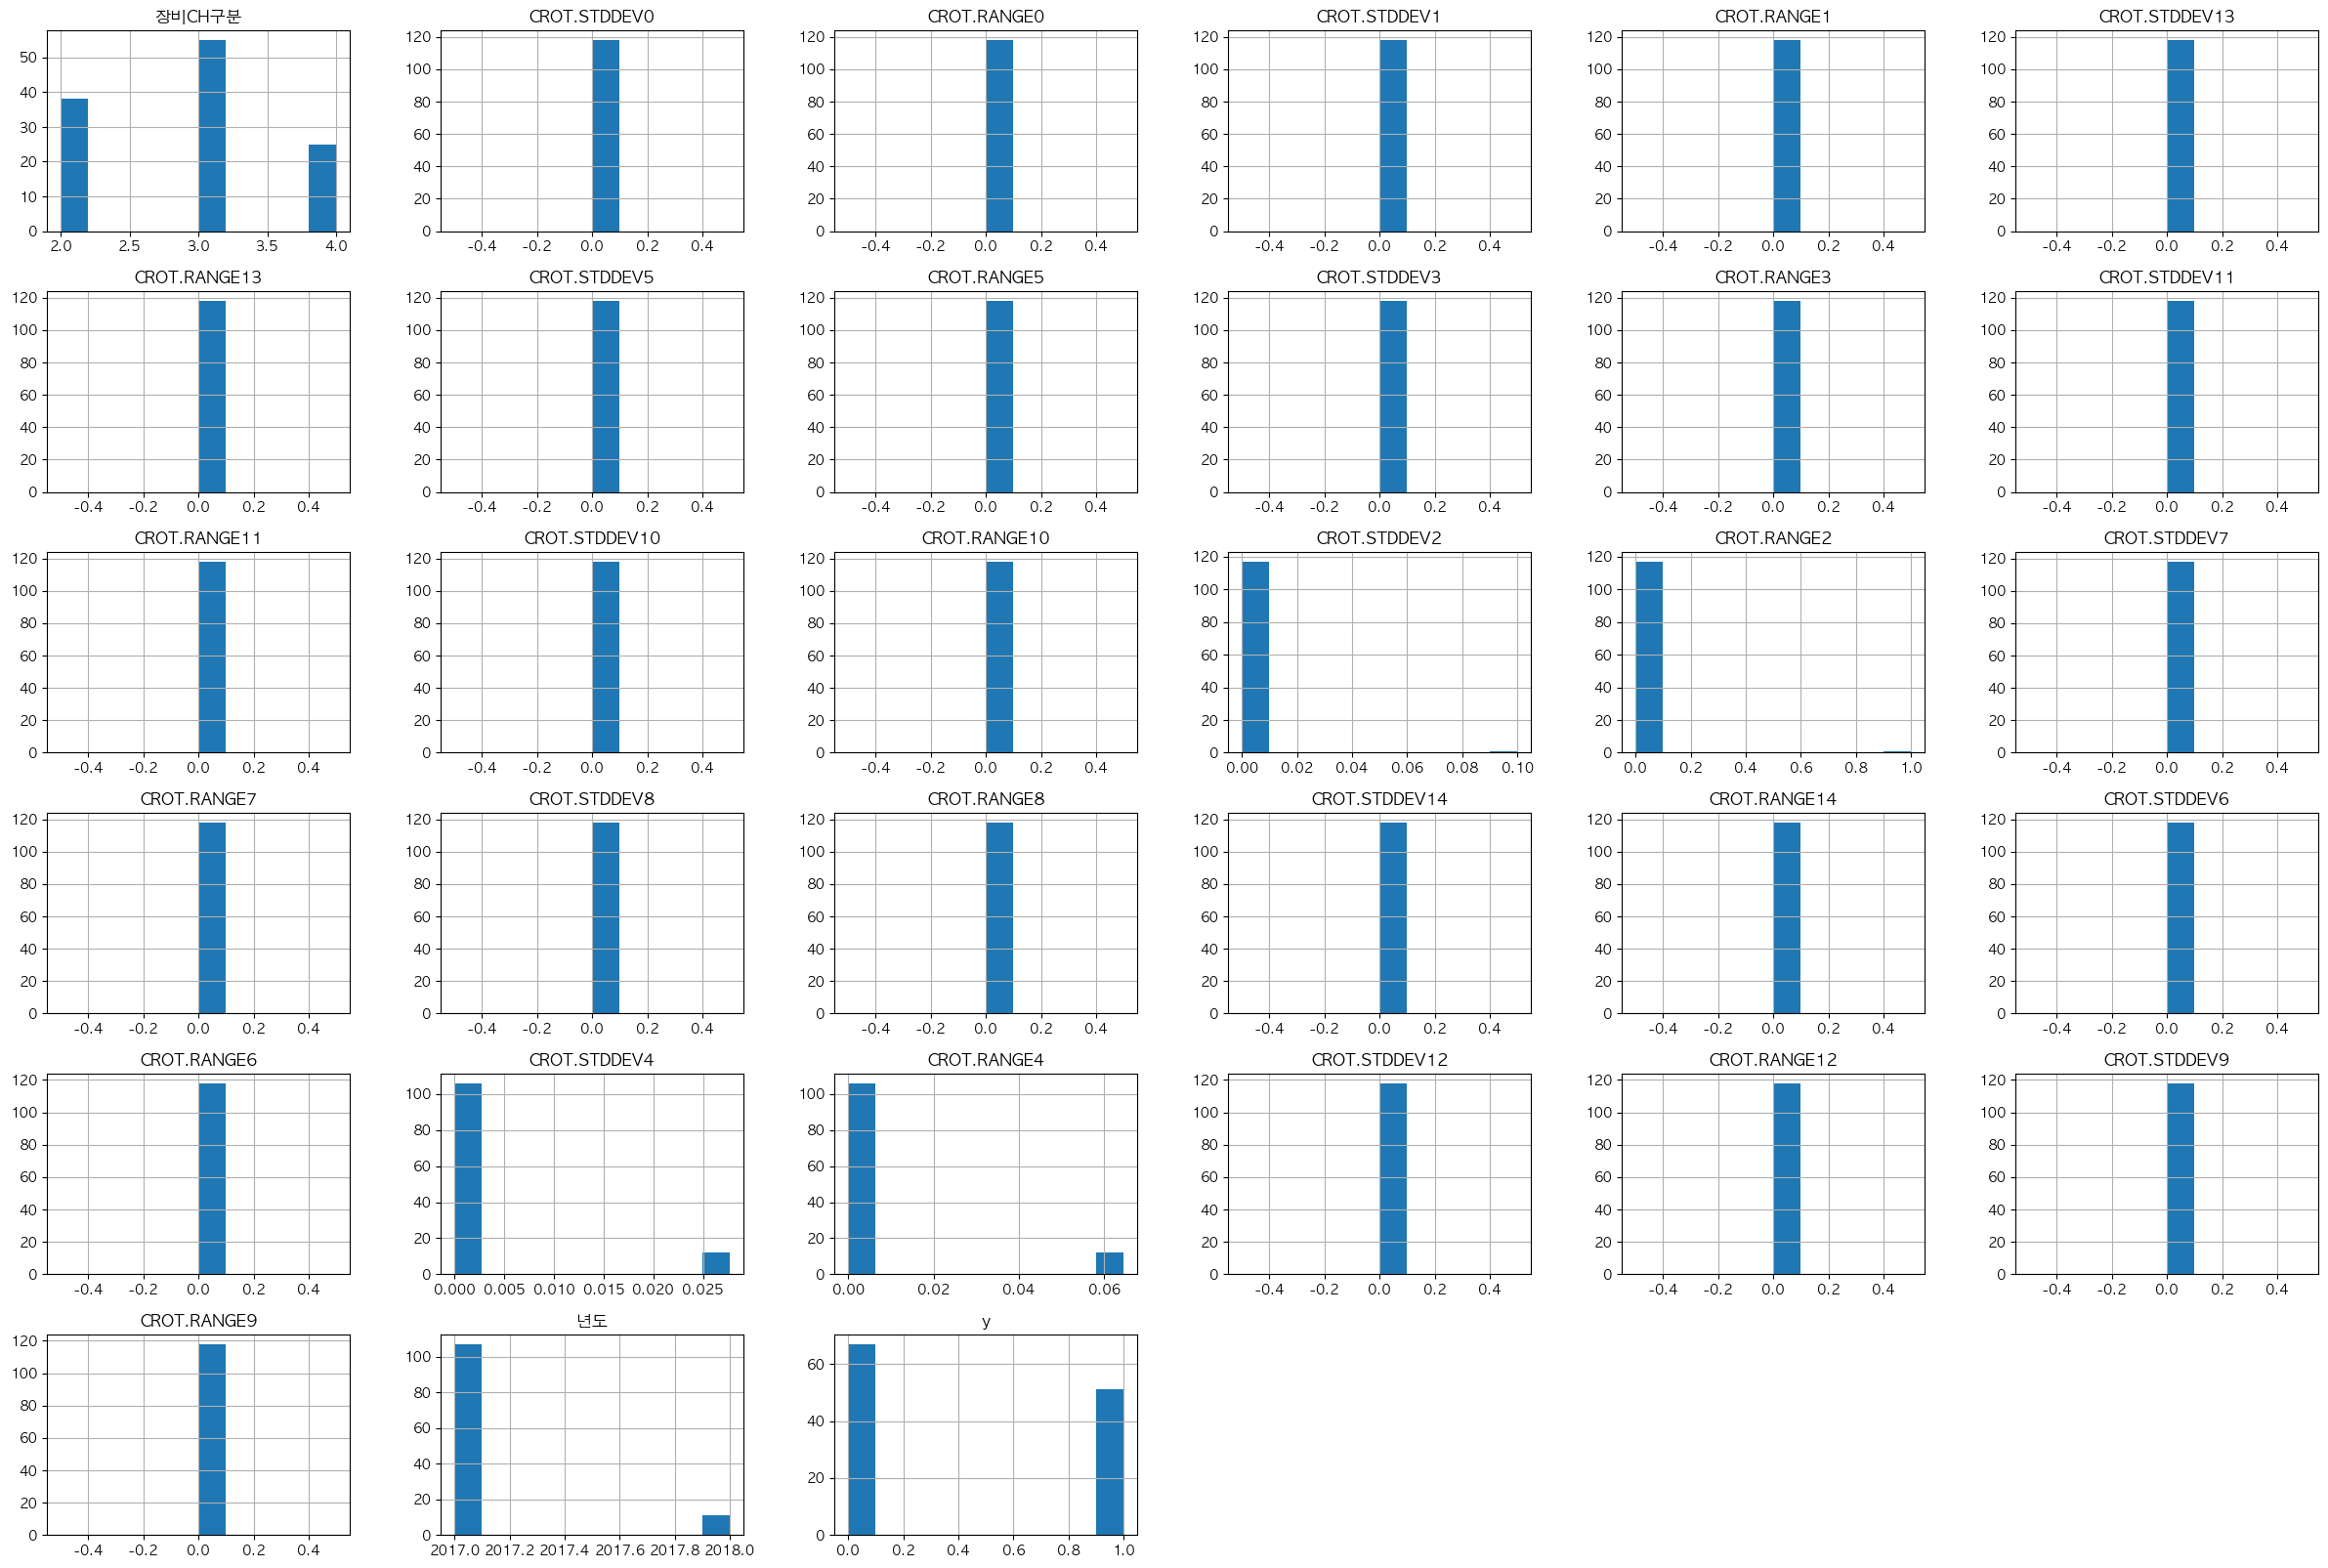

In [170]:
plt.rcParams["axes.unicode_minus"] = False
pre_data11.loc[:,pre_data11.columns[pre_data11.nunique() <= 4]].hist(figsize=(30,20))
plt.show()

#### 3. 위에서 찾은 변수들에 년도, 월, 일 변수를 포함하여 범주형  변수로 변환 (더미 코딩 수행)

In [171]:
pre_data12=pd.get_dummies(pre_data11,columns = pre_data11.columns[pre_data11.nunique() <= 4],drop_first=True)

In [172]:
pre_data12

,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.MEAN0,TAE.STDDEV1,TAE.MEAN1,TAE.RANGE1,CROT.MEAN1,PC.STDDEV1,PC.MEAN1,PC.RANGE1,TAE.STDDEV13,TAE.MEAN13,TAE.RANGE13,PC.STDDEV13,PC.MEAN13,PC.RANGE13,CROT.MEAN13,TAE.STDDEV5,TAE.MEAN5,TAE.RANGE5,CROT.MEAN5,PC.STDDEV5,PC.MEAN5,PC.RANGE5,TAE.STDDEV3,TAE.MEAN3,TAE.RANGE3,PC.STDDEV3,PC.MEAN3,PC.RANGE3,CROT.MEAN3,CROT.MEAN11,TAE.STDDEV11,TAE.MEAN11,TAE.RANGE11,PC.STDDEV11,PC.MEAN11,PC.RANGE11,PC.STDDEV10,PC.MEAN10,PC.RANGE10,CROT.MEAN10,TAE.STDDEV10,TAE.MEAN10,TAE.RANGE10,CROT.MEAN2,TAE.STDDEV2,TAE.MEAN2,TAE.RANGE2,PC.STDDEV2,PC.MEAN2,PC.RANGE2,CROT.MEAN7,TAE.STDDEV7,TAE.MEAN7,TAE.RANGE7,PC.STDDEV7,PC.MEAN7,PC.RANGE7,PC.STDDEV8,PC.MEAN8,PC.RANGE8,TAE.STDDEV8,TAE.MEAN8,TAE.RANGE8,CROT.MEAN8,CROT.MEAN14,TAE.STDDEV14,TAE.MEAN14,TAE.RANGE14,PC.STDDEV14,PC.MEAN14,PC.RANGE14,TAE.STDDEV6,TAE.MEAN6,TAE.RANGE6,PC.STDDEV6,PC.MEAN6,PC.RANGE6,CROT.MEAN6,TAE.STDDEV4,TAE.MEAN4,TAE.RANGE4,CROT.MEAN4,PC.STDDEV4,PC.MEAN4,PC.RANGE4,CROT.MEAN12,TAE.STDDEV12,TAE.MEAN12,TAE.RANGE12,PC.STDDEV12,PC.MEAN12,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.MEAN9,PC.STDDEV9,PC.MEAN9,PC.RANGE9,월,일,장비CH구분_3.0,장비CH구분_4.0,CROT.STDDEV2_0.1,CROT.RANGE2_1,CROT.STDDEV4_0.027704948064516132,CROT.RANGE4_0.06451612903225806,년도_2018,y_1
0,0.124753,0.044329,0.439883,35,0.121240,38.055619,0.317690,35,2.082389,44.228890,7.722385,0.309010,35.799846,1.016620,0.767937,45.194892,4.105572,35.0,0.022406,35.021534,0.127077,35,1.066394,45.160869,11.436951,0.039343,34.079036,0.127076,2.643621,57.197500,13.196480,35.0,35,0.105175,34.992667,0.444770,2.970423,45.796676,14.858261,0.916971,44.861925,4.154447,35,0.079951,38.009799,0.190615,35.0,0.089351,34.055887,0.571847,0.156611,56.501051,1.661780,35,0.022898,35.015540,0.127077,1.271140,45.185728,12.170089,1.660876,45.556057,6.256112,0.071511,38.017741,0.254153,35.0,35.0,0.000000,35.968620,0.000000,0.00000,3.714565,0.000000,0.061101,38.034651,0.254153,0.468056,44.957059,2.981427,35.0,0.212885,37.895276,0.635387,35.0,0.226691,45.082459,1.173024,35,0.164348,30.870404,0.698922,3.821034,57.645580,17.350926,0.032832,35.011650,0.127077,35,0.405343,45.124841,3.079182,9,25,0,1,0,0,0,0,0,1
1,0.177575,0.342131,0.439883,27,0.115462,38.016088,0.317695,27,4.485573,43.401760,17.008798,0.296837,36.342460,0.953080,0.295544,45.076476,1.759528,27.0,0.028516,36.113480,0.130338,27,0.258892,45.065592,2.981426,0.043760,34.542577,0.127079,0.513855,56.572739,2.492667,27.0,27,0.108088,35.515738,0.444770,0.316293,45.065419,1.710655,0.112830,45.042155,0.391007,27,0.081925,38.080194,0.317690,27.0,0.083689,34.513293,0.571849,0.838911,56.633541,8.113390,27,0.030655,35.548180,0.127080,0.177952,45.092321,1.466278,0.834384,45.281600,3.128057,0.072328,38.064309,0.317690,27.0,27.0,0.000000,36.495700,0.000000,0.00000,3.567937,0.000000,0.046026,38.053420,0.254153,0.393597,45.110669,1.710655,27.0,0.143218,37.917376,0.444771,27.0,0.172851,45.001991,1.124142,27,0.182612,31.379571,0.635388,0.303504,56.613882,1.466280,0.020858,35.550245,0.063540,27,1.923012,45.350277,15.004887,9,25,0,0,0,0,0,0,0,0
2,0.137559,0.063983,0.488759,15,0.119149,38.029244,0.317692,15,2.772591,43.897500,10.459431,0.368458,36.721879,1.207230,1.378733,45.330828,7.331377,15.0,0.038308,35.601156,0.200079,15,1.054788,45.177723,10.997066,0.052235,35.071344,0.190610,4.176787,57.711759,19.990226,15.0,15,0.140829,35.661305,0.540079,0.250996,45.116858,1.319644,1.465553,45.515640,5.180838,15,0.077226,38.117744,0.254153,15.0,0.088166,35.047624,0.571846,0.211331,56.547118,2.150536,15,0.024639,36.014162,0.127076,0.704581,45.143875,6.353858,0.029371,45.009233,0.097752,0.080522,38.112449,0.254153,15.0,15.0,0.000000,36.958164,0.000000,0.03456,3.934506,0.048876,0.060072,38.074977,0.317693,0.037383,44.999787,0.097752,15.0,0.065499,37.993607,0.254154,15.0,0.172851,45.001991,1.124142,15,0.185764,31.850868,0.635387,2.845739,57.296468,13.098728,0.021635,36.013373,0.063538,15,0.161640,45.071393,0.977516,9,25,1,0,0,0,0,0,0,0
3,1.441465,0.503421,6.549365,35,0.128293,38.060506,0.381230,35,1.771

## 4. 시각화하기

#### 1. 출력 변수(정상-0, 불량-1)별로 TAE.STDDEV9 변수에 대한 boxplot 그리기 

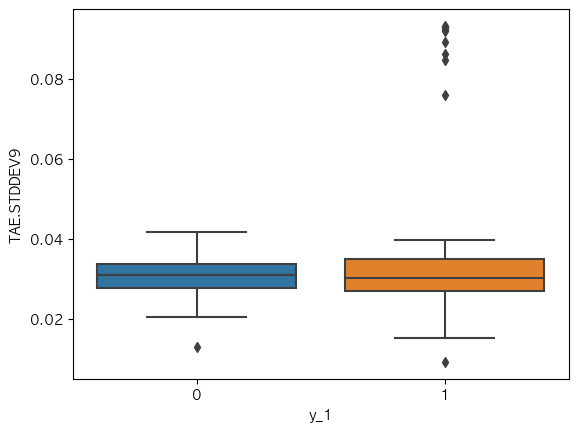

In [173]:
sns.boxplot(data=pre_data12, x= 'y_1', y='TAE.STDDEV9')
plt.show()

#### 2. 출력 변수(정상-0, 불량-1)별로 PC.MEAN0 변수에 대한 히스토그램 시각화

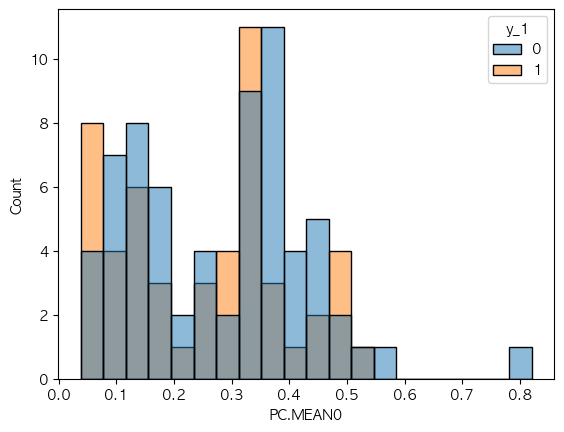

In [174]:
sns.histplot(data=pre_data12, hue='y_1', x='PC.MEAN0', bins=20)
plt.show()

#### 3. TAE.STDDEV7 변수와 별로 TAE.STDDEV11 변수에 대한 산점도 시각화

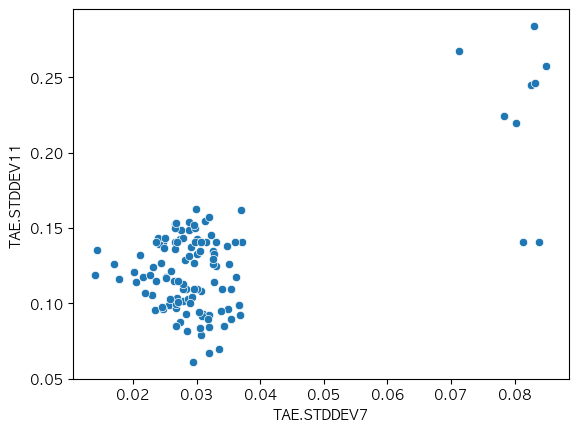

In [175]:
sns.scatterplot(data=pre_data12, x='TAE.STDDEV7', y= 'TAE.STDDEV11')
plt.show()